# Probability and Bayes' Theorem
We are most commonly used (and are exposed) to the so called **frequentist** interpretation of probability....

Richard Cox derfived the *laws* of probability from the consideration of the quantitative rules necessary for logical consistent reasoning. His starting point was the association of a numerical value to the relative belief about the thuth of propositions such as: (a) the pandemic will end next year; (b) it will rain tomorrow ; (c) this is a fair coin; and so on. The minimum requirement for this numerical value that represents relative beliefs in the truth of propositions is that it needs to obey the *transitive* property. This is, if we believe (a) more than (b), and believe (b) more than (c), then we must necessarily believe (a) more than (c). This requirement is granted by using a real number for such degree of belief.

Cox began by making two assertions. The first one is that if we specify the degree of belief in a proposition is true then we automatically specify our degree of disbelief in that proposition. The second assertion goes as follows, if we first specify how much we believe that proposition $Y$ is true, and then state how much we believe that X is true given that Y is true, then we have implicitly specified how much we believe that both X and Y are true. To work out the actual details of such relationships he appealed to the rules of Boolean logic and ordinary algebra. He found that this consistency could only be ensured if the real number which we are using to specify our degree of belief of several propositions obeyed the rules of probability:

$$\text{prob}(X|I)+ \text{prob}(\bar{X}|I) = 1,$$
and 
$$\text{prob}(X,Y|I) = \text{prob}(X|Y,I) + \text{prob}(Y|I),$$

where we have made the probabilities conditional on $I$, to denote the relevant prior information we might have. The above identities are known as the **sum** and **product** rules of probability. Some other results can be derived from them, for instance, **Bayes' theorem**:

$$\text{prob}(X|Y,I) = \dfrac{\text{prob}(Y|X,I)\text{prob}((X|I))}{\text{prob}(Y|I)}$$

is obtained by noting that the statement *both X and Y are true* is the same as *both Y and X are true* so that $\text{prob}(Y, X |I) = \text{prob}(X,Y|I)$, then it follows.

We used Bayes' theorem in a previous notebook to try to estimate the bias in a coin. In other words, by trying to answer the question: *how fair is this coin?*. 
In notebook 1-Introduction.ipynb we stated the problem of polynomial curve fitting as an optimization problem, where the goal was to minimize the error function. The same problem (of curve fitting) can be stated in probabilistic terms, as we shall see.

In general terms, the goal of this *curve-fitting* problem is to be able to make predictions about a **target** variable given some new value of the input variable $\mathbf{x}$ on the basis of a set of training data with $N$ input samples $mathbf{X}= (x_1, \dots, x_N)^T$ and $N$ target values $\mathbf{t} = (t_1, \dots, t_N)^T$. As in the case of the *'strange coin'*, we can express our uncertainty about the value of the target variable using a probability distribution. We could, for instance, assume that given the value of the input variable $\mathbf{x}$ the corresponding value of $t$ has a Gaussian distribution with mean equal to the value of:
$$y(x, \mathbf{w}) = \sum_{i}^{N}w_ix^i.$$
Thus the probability distribution is:
$$p(t|x, \mathbf{w}, \beta) = \mathcal{N}(t|y(x,\mathbf{w}), \beta^{-1}).$$

The idea is to use the training data $\{\mathbf{X}, \mathbf{t}\}$ to determine the values of the unknown parameters $\mathbf{w}$ and $\beta$ by maximizing the likelihood function. Assuming data to be iid, then the likelihood function is given by:

$$p(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta) = \prod_{i=1}^{N}\mathcal{N}\left(t_i|y(x_i, \vec{w}), \beta^{-1}\right)$$.

We will work with the logarithm of the above function for a matter of convenience, then the **log likelihood** function is:
$$\ln p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta) = -\dfrac{\beta}{2}\sum_{i}^{N}\left[t_i- y(x_i, \vec(w))\right]^2 +\dfrac{N}{2}\ln \beta - \dfrac{N}{2}\ln(2\pi).$$

To determine the maximum likelihood solution for the estimation of the polynomial coefficients $\vec{w}_{ML}$ we need to maximize the above function with respect to $\vec{w}$. Note that the last two terms are not functions of $\vec{w}$ and they won't survive the derivative. Also, the scaling factor in front of the first term does not affect the position of the maximum with respect to $\vec{w}$. Furthermore, instead of maximizing the log likelihood function we can minimize the negative log likelihood. Note that in the end, maximizing the likelihood is equivalent to minimizing the sum of sqaures error function we dealt with in notebook 1. The *sum-of-squares* error function has apperead as a consequence of maximizing the likelihood function under the assumption that the likelihood follows a Gaussian distribution.

The parameter $\beta$ can be estimated by maximizing the likelihood function as well, in this case, with respect to $\beta$, which yields:
$$\dfrac{1}{\beta_{ML}} = \dfrac{1}{N}\sum_{i= 1}^N \left(t_i - y(x_i, \mathbf{w}) \right)^2.$$

Once the parameters $\vec{w}_{ML}$ are determined, we can use them to estimate $\beta_{ML}$. Having these values, we can now make predictions for new samples of the input variable $x$, we have a probabilistic model. This model is expressed in terms of the *predictive distribution*, that gives the probability distribution over $t$, rather than simply a point estimate. 

$$p(t|x, \mathbf{w}_{ML}, \beta_{ML}) = \mathcal{N}\left(t | y(x, \mathbf{w}_{ML}), \beta_{ML}^{-1}\right).$$

Up to this point we haven't made any assumption about our prior knowledge of the polynomial coefficients $\vec{w}$. We could, for instance, assume they are iid from a Gaussian distribution of the form
$$p(\mathbf{w}|\alpha) = \mathcal{N}\left(\mathbf{w}|\mathbf{0}, \alpha^{-1} \mathbf{I}\right) = \left(\dfrac{\alpha}{2\pi}\right)^{(M+1)/2}\exp \left\{-\dfrac{\alpha}{2}\mathbf{w}^T\mathbf{w}\right\},$$
where $\alpha$ is the (so-called) *precision* of the distribution, and $M+1$ is the number of parameters in a $M$ dimensional vector $\mathbf{w}$ for an Mth order polynomial. Now that we have a prior distribution for the poynomial coefficients, we can use Bayes' theorem to estimate the posterior distribution for $\mathbf{w}$ which is proportional to the product of the prior and the likelihood function
$$p(\mathbf{w}|\mathbf{X}, \mathbf{t}, \alpha, \beta) \propto p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta)p(\mathbf{w}|\alpha).$$

Having the posterior at hand allows us to determine $\mathbf{w}$ by finding the most probable value of $\mathbf{w}$ given the data, by maximiing the posterior distribution. This technique is called *maximum posterior* or *MAP*. It is straightforward to show that maximizing the posterior distribution is equivalent to minimizing 
$$\dfrac{\beta}{2}\sum_{n=1}^{N}\left[y(x_i, \mathbf{w}- t_i)\right]^2+ \dfrac{\alpha}{2}\mathbf{w}^T\mathbf{w}.$$
Thus, we see that maximizing the posterior distribution is equivalent to minimizing the **regularized** sum-of-squares error function with a regularization parameter $\lambda = \alpha/\beta$.

To illustrate how we can use Bayesian Curve Fitting we will construct an artificial example and use sklearn's available `BayesianRidgeRegression` module.

# Imports

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import BayesianRidge

# Data
Assume that we have two real valued quantities $x, t \in \mathbb{R}$ that are related via some "map" that we are interested in "learning". We will generate artificial data for this example so that we already know the function that relates $t$ and $x$, for example: f(x) = $\sin(2 \pi x)$ plus some random noise drawn from a normal distribution. In this case the variables $x,t \in [0,1]$.

Suppose that we are given $N$ samples (observations) of this relation between $x$ and $t$. This is, we are given a vector $\mathbf{X} = (x_1, x_2, \dots, x_N)^T$ together with $N$ observations of the target variable $\mathbf{t} = (t_1, t_2, \dots, t_N)^T$.

In [10]:
def func(x):
    '''
    '''
    return np.sin(2*np.pi*x)

In [17]:
size = 25
rng = np.random.RandomState(1234)
x = np.arange(0,1,0.05)
x_train = rng.uniform(0., 1., size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 1., 100)

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


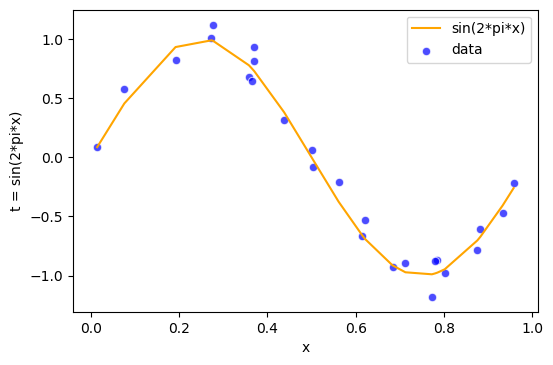

In [18]:
fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(x_train, y_train, ax = ax, color = 'blue', label = 'data', alpha = 0.7)
sns.lineplot(x_train, func(x_train), color = 'orange', label = 'sin(2*pi*x)')
ax.set_xlabel('x')
ax.set_ylabel('t = sin(2*pi*x)')
fig.show()

Use `np.vander` to create a matrix of powers of the input vector, this is, polynomial fitting!

In [19]:
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)